In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_bmyrc_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Myrcene
0,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
3,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74996,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..Beta-Myrcene'], axis = 1)
y = df_mlp[['X..Beta-Myrcene']]

<AxesSubplot:ylabel='Count'>

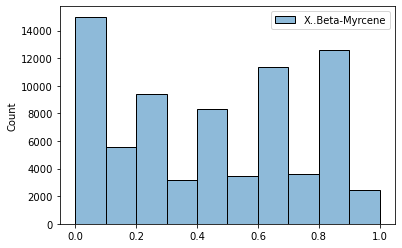

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.1538556893813141

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.6266982856499197

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.5038038062929986

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.21901247e-01, 1.26868272e-01, 1.17362348e-01, 1.10383286e-01,
       1.15230347e-01, 1.26119750e-03, 1.36638284e-02, 3.15645960e-02,
       7.04119848e-05, 2.46332260e-03, 5.23505421e-03, 4.10675195e-07,
       1.10043111e-02, 8.57297092e-05, 4.09637644e-03, 6.74533177e-03,
       9.10057157e-03, 8.11609683e-03, 7.82600865e-07, 1.10498198e-02,
       0.00000000e+00, 1.20035568e-06, 9.35562852e-03, 6.84770303e-03,
       1.33605334e-02, 3.39462571e-03, 9.27922345e-03, 8.30618980e-05,
       5.43899376e-08, 3.03378706e-03, 1.42818656e-02, 1.09655727e-07,
       1.32769320e-02, 0.00000000e+00, 0.00000000e+00, 8.95880934e-03,
       8.32348983e-03, 9.27921695e-03, 7.05089159e-04, 8.18457508e-04,
       1.07826823e-04, 7.32033037e-03, 3.39950360e-04, 1.52505407e-02,
       5.81447800e-04, 9.71834541e-03, 2.23228947e-03, 4.51147200e-04,
       7.73391263e-03, 3.68163016e-03, 1.60650738e-02, 1.15314962e-02,
       4.53681801e-03, 4.53940907e-03, 4.49178094e-03, 5.32109809e-04,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,sativa,happy,relaxed,sleepy,blueberry,diesel,mint,sweet
0,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
3,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0,0,0
74996,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'sativa',
 'happy',
 'relaxed',
 'sleepy',
 'blueberry',
 'diesel',
 'mint',
 'sweet']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_bmyrc.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_bmyrc.pkl")

['selected_X_mlp_lsa_elbow_bmyrc.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_bmyrc.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.21448797934790015

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.2696150097623028

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.24229301402919678

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_bmyrc.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_bmyrc.pkl")

['rscv_mlp_lsa_elbow_best_params_bmyrc.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'tanh', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.1389850169799586

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.7128359121428495

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.5755530051933617

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_bmyrc.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_bmyrc.pkl")

['y_test_mlpreg_lsa_elbow_bmyrc.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.13869398452300385

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.03613945195781789

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.1901037925918836

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.5745721077260217

Error analysis

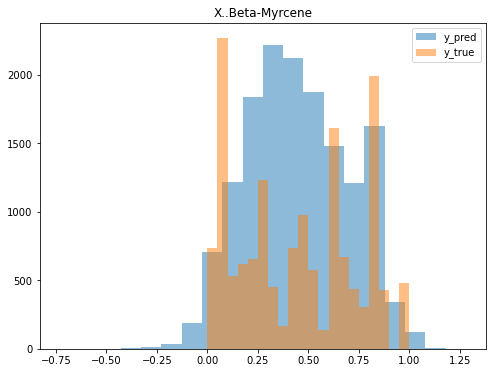

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_bmyrc.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.764
P-value: 0.000


<AxesSubplot:>

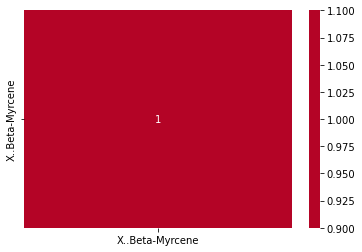

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)